# Data contains power for multiple ACs at some hotel in Gurgaon.

Identify patterns/trends in the data?
Which AC was used the most/least?

Optional (Bonus questions):

Relate this power data with the outside temperature of Gurgaon. (Feel free to use temperature data from any website online. How will you fetch that data in your analysis?

Using the power data, predict/forecast the power consumption?

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [46]:
ds=pd.read_csv('AC_Data.csv')
ds

0      AC 1      AC 2      AC 3      AC 4      AC 5  \
0      2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
1      2019-08-01 00:01:00       NaN       NaN       NaN       NaN       NaN   
2      2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
3      2019-08-01 00:03:00       NaN       NaN       NaN       NaN       NaN   
4      2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   
...                    ...       ...       ...       ...       ...       ...   
87835  2019-09-30 23:55:00  0.000000  6.122385  2.192198  2.083315  1.046250   
87836  2019-09-30 23:56:00       NaN       NaN       NaN       NaN       NaN   
87837  2019-09-30 23:57:00  1.209176  6.152532  2.211421  0.000000  1.448103   
87838  2019-09-30 23:58:00       NaN       NaN       NaN       NaN       NaN   
87839  2019-09-30 23:59:00  1.430442  6.078281  1.891162  0.000000  1.577491   

           AC 6      AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
0      4.079041  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2      3.781231  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4      3.800127  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409   
...         ...       ...       ...       ...       ...       ...       ...   
87835  0.000000  3.668421  3.006311  3.614301  1.860847  5.019769  3.154221   
87836       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87837  0.000000  3.151248  2.871690  3.417942  2.185493  5.174168  2.772349   
87838       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87839  4.364239  3.126339  3.287224  3.986978  2.013912  4.821829  3.363855   

          AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  
0      3.142941  2.749470  5.417774  4.113460  3.305072  6.735981  
1           NaN       NaN       NaN       NaN       NaN       NaN  
2      3.085110  2.720484  3.302422  3.986483  3.220588  6.379500  
3           NaN       NaN       NaN       NaN       NaN       NaN  
4      3.132799  2.676861  3.539026  3.797881  3.131560  6.363475  
...         ...       ...       ...       ...       ...       ...  
87835  3.648026  2.439526  4.062719  1.854352  3.027539  7.259989  
87836       NaN       NaN       NaN       NaN       NaN       NaN  
87837  3.786657  2.060023  4.057525  1.870886  2.991946  7.134647  
87838       NaN       NaN       NaN       NaN       NaN       NaN  
87839  3.380110  1.949240  4.026304  1.862166  3.009434  7.179719  

[87840 rows x 19 columns]

So, Here We have 87840 rows and 19 columns present in the dataset.

## Analysing the Patterns

In [47]:
# Checking Top 5 heads of the dataset
ds.head()

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1  2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3  2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
4  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
1       NaN       NaN       NaN       NaN       NaN  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
3       NaN       NaN       NaN       NaN       NaN  
4  2.676861  3.539026  3.797881  3.131560  6.363475

In [48]:
# Checking Bottom 5 of the datasets
ds.tail()

0      AC 1      AC 2      AC 3      AC 4      AC 5  \
87835  2019-09-30 23:55:00  0.000000  6.122385  2.192198  2.083315  1.046250   
87836  2019-09-30 23:56:00       NaN       NaN       NaN       NaN       NaN   
87837  2019-09-30 23:57:00  1.209176  6.152532  2.211421  0.000000  1.448103   
87838  2019-09-30 23:58:00       NaN       NaN       NaN       NaN       NaN   
87839  2019-09-30 23:59:00  1.430442  6.078281  1.891162  0.000000  1.577491   

           AC 6      AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
87835  0.000000  3.668421  3.006311  3.614301  1.860847  5.019769  3.154221   
87836       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87837  0.000000  3.151248  2.871690  3.417942  2.185493  5.174168  2.772349   
87838       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
87839  4.364239  3.126339  3.287224  3.986978  2.013912  4.821829  3.363855   

          AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  
87835  3.648026  2.439526  4.062719  1.854352  3.027539  7.259989  
87836       NaN       NaN       NaN       NaN       NaN       NaN  
87837  3.786657  2.060023  4.057525  1.870886  2.991946  7.134647  
87838       NaN       NaN       NaN       NaN       NaN       NaN  
87839  3.380110  1.949240  4.026304  1.862166  3.009434  7.179719

In [49]:
# Checking Datatypes
ds.dtypes

0         object
AC 1     float64
AC 2     float64
AC 3     float64
AC 4     float64
AC 5     float64
AC 6     float64
AC 7     float64
AC 8     float64
AC 9     float64
AC 10    float64
AC 11    float64
AC 12    float64
AC 13    float64
AC 14    float64
AC 15    float64
AC 16    float64
AC 17    float64
AC 18    float64
dtype: object

So first column is of Object data type and remaining column is of float data type.

In [50]:
# Checking Null values
ds.isnull().sum()

0            0
AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

So here except first column there is null values are present in every column in large amount ,So if we apply fillna for filling the null values then data will be not able to predict perfect prediction , so here dropping of null values are necesaary.

## Handling Null values Present in the dataset

In [51]:
# Dropping Null values
ds.dropna(inplace=True)

In [52]:
ds


0      AC 1      AC 2      AC 3      AC 4      AC 5  \
0      2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
2      2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
4      2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   
6      2019-08-01 00:06:00  6.665446  9.065626  0.000000  0.000000  2.575639   
8      2019-08-01 00:08:00  6.674838  9.096130  0.000000  0.000000  2.021472   
...                    ...       ...       ...       ...       ...       ...   
87831  2019-09-30 23:51:00  0.000000  6.089533  2.322677  1.422932  0.000000   
87833  2019-09-30 23:53:00  0.000000  6.046765  2.195754  1.861175  0.813454   
87835  2019-09-30 23:55:00  0.000000  6.122385  2.192198  2.083315  1.046250   
87837  2019-09-30 23:57:00  1.209176  6.152532  2.211421  0.000000  1.448103   
87839  2019-09-30 23:59:00  1.430442  6.078281  1.891162  0.000000  1.577491   

           AC 6      AC 7      AC 8      AC 9     AC 10     AC 11     AC 12  \
0      4.079041  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373   
2      3.781231  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730   
4      3.800127  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409   
6      3.772891  2.596200  5.805132  3.553778  1.878356  2.737645  2.510972   
8      3.155697  2.845417  6.315060  3.042244  1.914650  2.452500  2.171791   
...         ...       ...       ...       ...       ...       ...       ...   
87831  0.000000  3.729901  3.747301  3.578350  1.714157  5.146438  3.253012   
87833  0.000000  3.666080  3.017628  3.600397  1.547953  4.379771  3.144666   
87835  0.000000  3.668421  3.006311  3.614301  1.860847  5.019769  3.154221   
87837  0.000000  3.151248  2.871690  3.417942  2.185493  5.174168  2.772349   
87839  4.364239  3.126339  3.287224  3.986978  2.013912  4.821829  3.363855   

          AC 13     AC 14     AC 15     AC 16     AC 17     AC 18  
0      3.142941  2.749470  5.417774  4.113460  3.305072  6.735981  
2      3.085110  2.720484  3.302422  3.986483  3.220588  6.379500  
4      3.132799  2.676861  3.539026  3.797881  3.131560  6.363475  
6      3.090007  2.666604  4.607439  3.062610  3.063953  6.127366  
8      3.097202  2.710572  5.332696  2.640150  2.864680  5.662474  
...         ...       ...       ...       ...       ...       ...  
87831  2.464426  2.829701  3.693877  1.992432  3.029462  7.202612  
87833  3.045807  2.693068  4.090679  1.944854  3.048858  7.348333  
87835  3.648026  2.439526  4.062719  1.854352  3.027539  7.259989  
87837  3.786657  2.060023  4.057525  1.870886  2.991946  7.134647  
87839  3.380110  1.949240  4.026304  1.862166  3.009434  7.179719  

[34642 rows x 19 columns]

Now We have 34642 rows and 19 columns are presnt after dropping the null values.

In [53]:
# Checking null values again
ds.isnull().sum()

0        0
AC 1     0
AC 2     0
AC 3     0
AC 4     0
AC 5     0
AC 6     0
AC 7     0
AC 8     0
AC 9     0
AC 10    0
AC 11    0
AC 12    0
AC 13    0
AC 14    0
AC 15    0
AC 16    0
AC 17    0
AC 18    0
dtype: int64

Heatmap of null values


<AxesSubplot:>

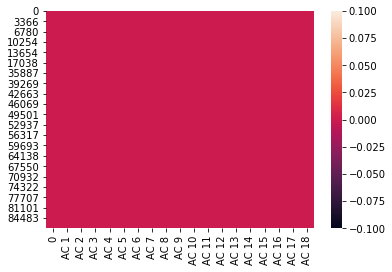

In [54]:
# checking null values through heat map
print('Heatmap of null values')
sns.heatmap(ds.isnull())

So Heatmap is also showing that null values are not present in the dataset.

## Handling First column that is of Date and Time column

So, during above analysis I found that our first column is containing Date and Time and Date is same for all the ACs but Time is varrying ,so we need to extract date and time from that column.

In [55]:
## Changing the name of the column for better analysis
ds.columns = ds.columns.str.replace('0', 'Date_time')

In [57]:
ds.dtypes

Date_time         object
AC 1             float64
AC 2             float64
AC 3             float64
AC 4             float64
AC 5             float64
AC 6             float64
AC 7             float64
AC 8             float64
AC 9             float64
AC 1Date_time    float64
AC 11            float64
AC 12            float64
AC 13            float64
AC 14            float64
AC 15            float64
AC 16            float64
AC 17            float64
AC 18            float64
dtype: object

Now we can see column name is changed now

In [59]:
# convert date_time column to datetime type
ds.Date_time = pd.to_datetime(ds.Date_time)

In [65]:
# extract day feature
days= ds.Date_time.dt.day

In [66]:
# extract month feature
months= ds.Date_time.dt.month

In [67]:
# extract year feature
years= ds.Date_time.dt.year

In [60]:
# extract hour feature
hours = ds.Date_time.dt.hour

In [61]:
# extract minute feature
minute = ds.Date_time.dt.minute

In [62]:
# extract second feature
second = ds.Date_time.dt.second

Now we can see hours, minutes and seconds are successfully extracted from first column.

In [68]:
# Now Adding the extracted Parts from the Date_time column in Main Dataframe

ds['Hours']=hours
ds['Minutes']=minute
ds['Seconds']=second
ds['Days']=days
ds['Months']=months
ds['Years']=years


In [69]:
ds

Date_time      AC 1      AC 2      AC 3      AC 4      AC 5  \
0     2019-08-01 00:00:00  7.518632  8.788315  0.000000  0.000000  2.617045   
2     2019-08-01 00:02:00  7.426114  8.940615  0.000000  0.000000  2.581625   
4     2019-08-01 00:04:00  7.052986  9.161103  0.000000  0.000000  2.592095   
6     2019-08-01 00:06:00  6.665446  9.065626  0.000000  0.000000  2.575639   
8     2019-08-01 00:08:00  6.674838  9.096130  0.000000  0.000000  2.021472   
...                   ...       ...       ...       ...       ...       ...   
87831 2019-09-30 23:51:00  0.000000  6.089533  2.322677  1.422932  0.000000   
87833 2019-09-30 23:53:00  0.000000  6.046765  2.195754  1.861175  0.813454   
87835 2019-09-30 23:55:00  0.000000  6.122385  2.192198  2.083315  1.046250   
87837 2019-09-30 23:57:00  1.209176  6.152532  2.211421  0.000000  1.448103   
87839 2019-09-30 23:59:00  1.430442  6.078281  1.891162  0.000000  1.577491   

           AC 6      AC 7      AC 8      AC 9  ...     AC 15     AC 16  \
0      4.079041  2.782276  4.624447  5.222060  ...  5.417774  4.113460   
2      3.781231  2.529366  5.057423  5.349465  ...  3.302422  3.986483   
4      3.800127  2.332304  6.322521  3.995392  ...  3.539026  3.797881   
6      3.772891  2.596200  5.805132  3.553778  ...  4.607439  3.062610   
8      3.155697  2.845417  6.315060  3.042244  ...  5.332696  2.640150   
...         ...       ...       ...       ...  ...       ...       ...   
87831  0.000000  3.729901  3.747301  3.578350  ...  3.693877  1.992432   
87833  0.000000  3.666080  3.017628  3.600397  ...  4.090679  1.944854   
87835  0.000000  3.668421  3.006311  3.614301  ...  4.062719  1.854352   
87837  0.000000  3.151248  2.871690  3.417942  ...  4.057525  1.870886   
87839  4.364239  3.126339  3.287224  3.986978  ...  4.026304  1.862166   

          AC 17     AC 18  Hours  Minutes  Seconds  Days  Months  Years  
0      3.305072  6.735981      0        0        0     1       8   2019  
2      3.220588  6.379500      0        2        0     1       8   2019  
4      3.131560  6.363475      0        4        0     1       8   2019  
6      3.063953  6.127366      0        6        0     1       8   2019  
8      2.864680  5.662474      0        8        0     1       8   2019  
...         ...       ...    ...      ...      ...   ...     ...    ...  
87831  3.029462  7.202612     23       51        0    30       9   2019  
87833  3.048858  7.348333     23       53        0    30       9   2019  
87835  3.027539  7.259989     23       55        0    30       9   2019  
87837  2.991946  7.134647     23       57        0    30       9   2019  
87839  3.009434  7.179719     23       59        0    30       9   2019  

[34642 rows x 25 columns]

Now we can see 6 columns has been increased and now we have 34642 rows and 25 columns are presnt in the dataset.

So after successful extraction of Date and Time Part from Date_time column further use of this column is not necessary so I am dropping it from the dataset.



## Dropping Date_time column

In [70]:
del ds['Date_time']

In [72]:
ds.shape

(34642, 24)

## Exploratory Data Analysis using distribution plot and scatter plot

In [74]:
ds.columns

Index(['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 1Date_time', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18', 'Hours', 'Minutes', 'Seconds', 'Days', 'Months',
       'Years'],
      dtype='object')

### Distribution Plot

<AxesSubplot:xlabel='AC 1', ylabel='Density'>

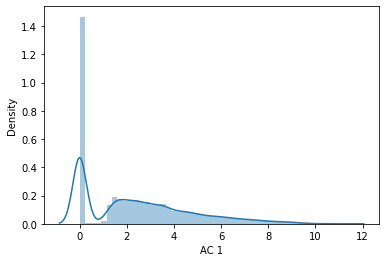

In [75]:
# AC 1
sns.distplot(ds['AC 1'],kde=True)

So in AC 1 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to 0.2

<AxesSubplot:xlabel='AC 2', ylabel='Density'>

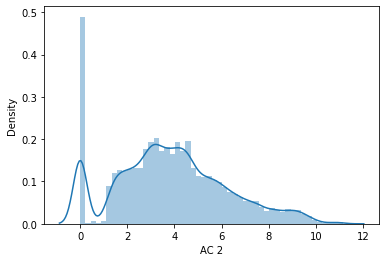

In [76]:
# AC 2
sns.distplot(ds['AC 2'],kde=True)

So in AC 2 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10.2 with density in between 0.0 to approx 0.13

<AxesSubplot:xlabel='AC 3', ylabel='Density'>

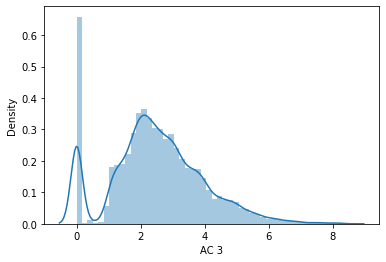

In [77]:
# AC 3
sns.distplot(ds['AC 3'],kde=True)

So in AC 3 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.35

<AxesSubplot:xlabel='AC 4', ylabel='Density'>

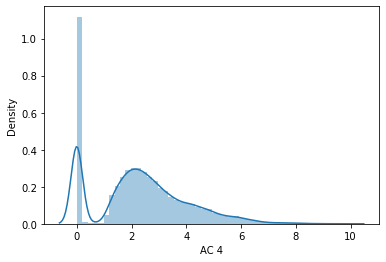

In [78]:
# AC 4
sns.distplot(ds['AC 4'],kde=True)

So in AC 4 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.4



<AxesSubplot:xlabel='AC 5', ylabel='Density'>

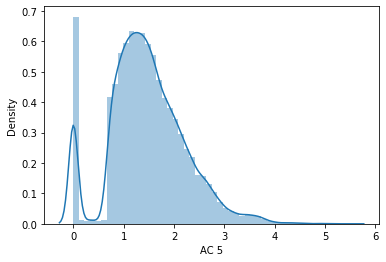

In [79]:
# AC 5
sns.distplot(ds['AC 5'],kde=True)

So in AC 5 column, distribution plot is showing that most of the data is lying in the range of 0.5 to approx 4 with density in between 0.0 to approx 0.61 and some how its look like bit left skewed.

<AxesSubplot:xlabel='AC 6', ylabel='Density'>

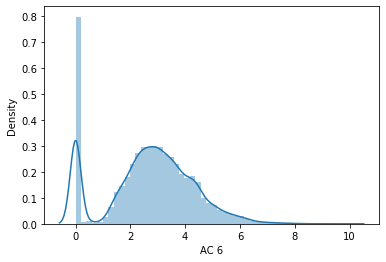

In [80]:
# AC 6
sns.distplot(ds['AC 6'],kde=True)

So in AC 6 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.29.

<AxesSubplot:xlabel='AC 7', ylabel='Density'>

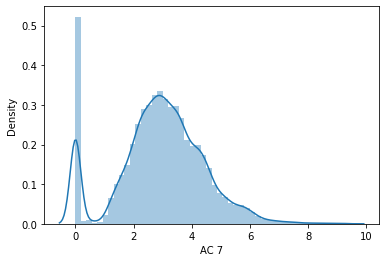

In [81]:
# AC 7
sns.distplot(ds['AC 7'],kde=True)

So in AC 7 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8 with density in between 0.0 to approx 0.34 and somehow it is looking like bell shaped curve.

<AxesSubplot:xlabel='AC 8', ylabel='Density'>

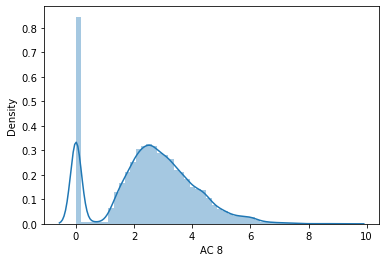

In [82]:
# AC 8
sns.distplot(ds['AC 8'],kde=True)

So in AC 8 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.3

<AxesSubplot:xlabel='AC 9', ylabel='Density'>

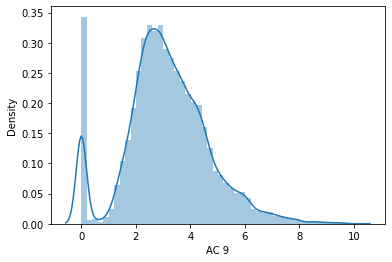

In [83]:
# AC 9
sns.distplot(ds['AC 9'],kde=True)

So in AC 9 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8.2 with density in between 0.0 to approx 0.35 and somehow it is looking like bell shaped curve.

<AxesSubplot:xlabel='AC 1Date_time', ylabel='Density'>

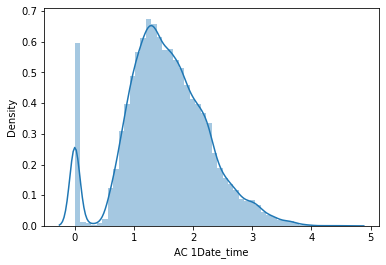

In [85]:
# AC 1Date_time
sns.distplot(ds['AC 1Date_time'],kde=True)

So in AC 1Date_tim  column, distribution plot is showing that most of the data is lying in the range of 1 to approx 4 with density in between 0.0 to approx 0.7 and somehow it is looking like bell shaped curve.

<AxesSubplot:xlabel='AC 11', ylabel='Density'>

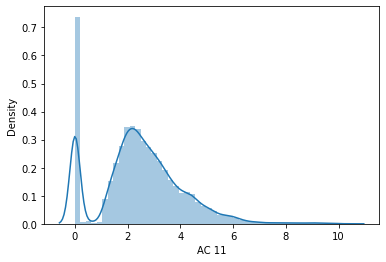

In [86]:
# AC 11
sns.distplot(ds['AC 11'],kde=True)

So in AC 11 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.4 

<AxesSubplot:xlabel='AC 12', ylabel='Density'>

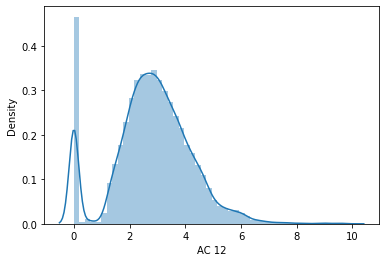

In [87]:
# AC 12
sns.distplot(ds['AC 12'],kde=True)

So in AC 12 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 7 with density in between 0.0 to approx 0.35



<AxesSubplot:xlabel='AC 13', ylabel='Density'>

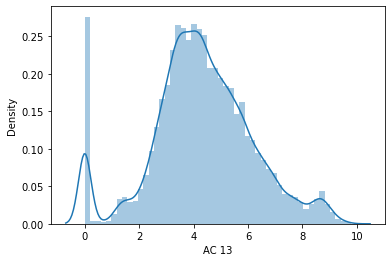

In [88]:
# AC 13
sns.distplot(ds['AC 13'],kde=True)

So in AC 13 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to approx 0.25 and it is looking bell shaped curve.

<AxesSubplot:xlabel='AC 14', ylabel='Density'>

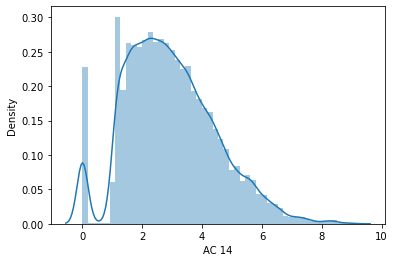

In [89]:
# AC 14
sns.distplot(ds['AC 14'],kde=True)

So in AC 14 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8.3 with density in between 0.0 to approx 0.27

<AxesSubplot:xlabel='AC 15', ylabel='Density'>

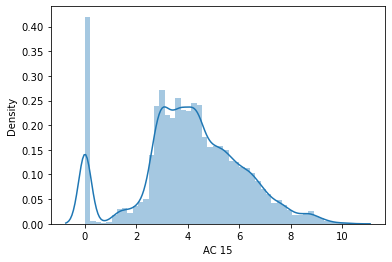

In [90]:
# AC 15
sns.distplot(ds['AC 15'],kde=True)

So in AC 15 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 10 with density in between 0.0 to approx 0.25 and its looking almost normally distributed.



<AxesSubplot:xlabel='AC 16', ylabel='Density'>

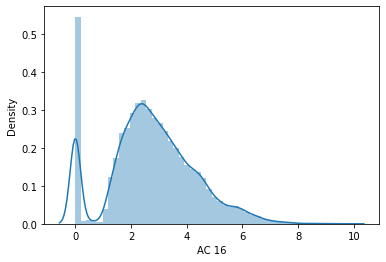

In [91]:
# AC 16
sns.distplot(ds['AC 16'],kde=True)

So in AC 16 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 8 with density in between 0.0 to approx 0.3 

<AxesSubplot:xlabel='AC 17', ylabel='Density'>

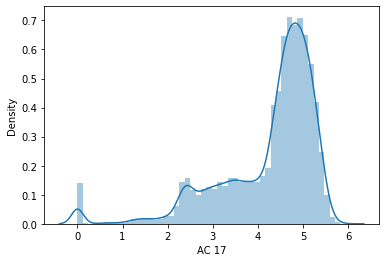

In [92]:
# AC 17
sns.distplot(ds['AC 17'],kde=True)

So in AC 17 column, distribution plot is showing that most of the data is lying in the range of 1 to approx 6 with density in between 0.0 to approx 0.7 and large amount of data in lying in right side so this is right skewed.

<AxesSubplot:xlabel='AC 18', ylabel='Density'>

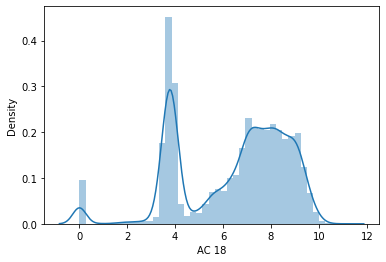

In [93]:
# AC 18
sns.distplot(ds['AC 18'],kde=True)

So in AC 18 column, distribution plot is showing that most of the data is lying in the range of 2 to approx 10 with density in between 0.0 to approx 0.2 and data is not looking normally distributed.

<AxesSubplot:xlabel='Hours', ylabel='Density'>

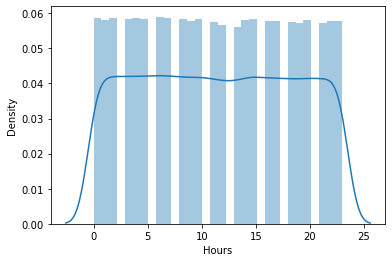

In [95]:
# Hours
sns.distplot(ds['Hours'],kde=True)

Hours column is showing Patterns and it is normally distributed and also looking bell shaped curve, ranges are in between 0 to 24 with density from 0.0 to approx 0.04.


<AxesSubplot:xlabel='Minutes', ylabel='Density'>

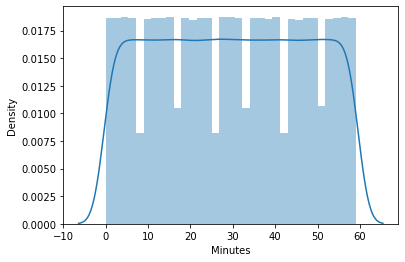

In [96]:
# Minutes
sns.distplot(ds['Minutes'],kde=True)

Minutes column is normally distributed with bell shaped curve and ranges in between 0 to 60 with density from 0.0 to approx 0.0175.

<AxesSubplot:xlabel='Seconds', ylabel='Density'>

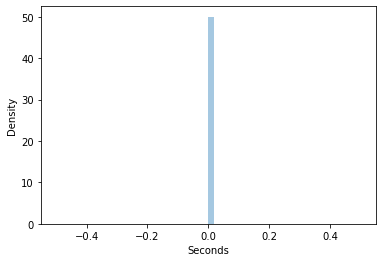

In [97]:
# Seconds
sns.distplot(ds['Seconds'],kde=True)

Seconds column is showing only 0 second.

<AxesSubplot:xlabel='Days', ylabel='Density'>

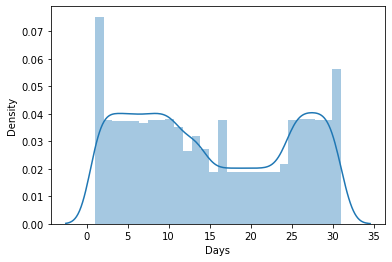

In [98]:
# Days
sns.distplot(ds['Days'],kde=True)

Days column is looking somehow normally distributed and ranges in between 1 to 30 and density from 0.0 to approx 0.04

Months and Year is same for all.

### Scatter Plot

In [106]:
ds.columns

Index(['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 1Date_time', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16',
       'AC 17', 'AC 18', 'Hours', 'Minutes', 'Seconds', 'Days', 'Months',
       'Years'],
      dtype='object')

<AxesSubplot:title={'center':' comparison between  AC 1 and Hours'}, xlabel='AC 1', ylabel='Hours'>

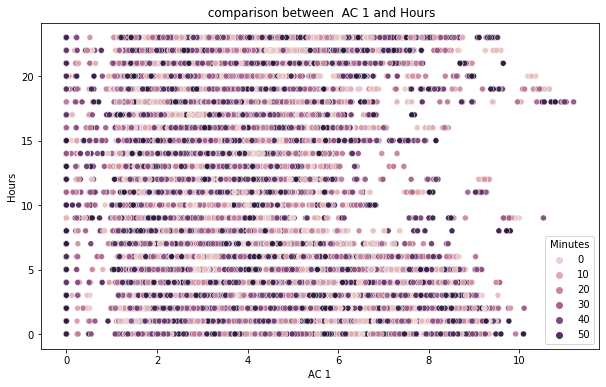

In [114]:
# comparison between  AC 1 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 1 and Hours')
sns.scatterplot(ds['AC 1'], ds['Hours'],hue=ds['Minutes'])

This comparison between AC 1 and Hours with respect to minutes is showing positive relationship.

<AxesSubplot:title={'center':' comparison between  AC 2 and Hours'}, xlabel='AC 2', ylabel='Hours'>

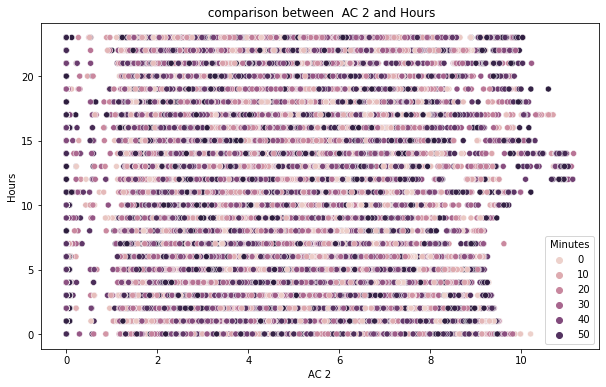

In [115]:
# comparison between  AC 2 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 2 and Hours')
sns.scatterplot(ds['AC 2'], ds['Hours'],hue=ds['Minutes'])

The comparison between AC 2 and Hours with respect to minutes is showing positive relationship.

<AxesSubplot:title={'center':' comparison between  AC 3 and Hours'}, xlabel='AC 3', ylabel='Hours'>

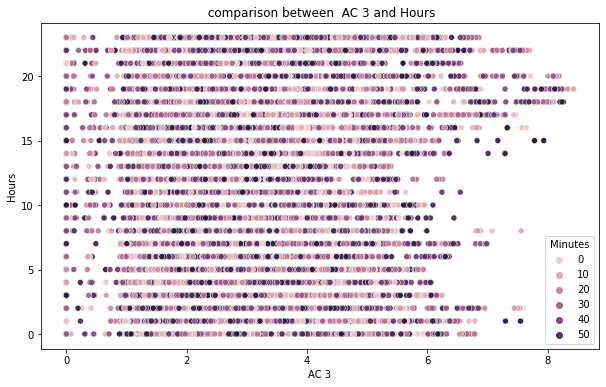

In [116]:
# comparison between  AC 3 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 3 and Hours')
sns.scatterplot(ds['AC 3'], ds['Hours'],hue=ds['Minutes'])

The comparison between AC 3 and Hours with respect to minutes is showing positive relationship and the dark bulbbles are showing most of the amount.

<AxesSubplot:title={'center':' comparison between  AC 4 and Hours'}, xlabel='AC 4', ylabel='Hours'>

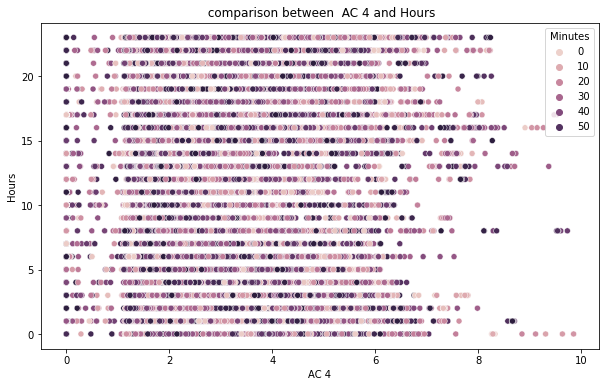

In [117]:
# comparison between  AC 4 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 4 and Hours')
sns.scatterplot(ds['AC 4'], ds['Hours'],hue=ds['Minutes'])

comparison between  AC 4 and Hours with respect to Minutes is showing positivity.

<AxesSubplot:title={'center':' comparison between  AC 5 and Hours'}, xlabel='AC 5', ylabel='Hours'>

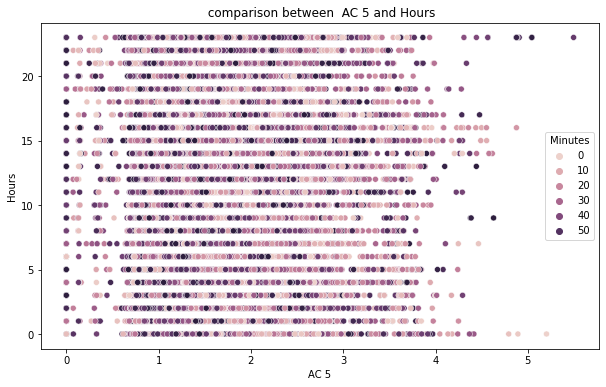

In [118]:
# comparison between  AC 5 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 5 and Hours')
sns.scatterplot(ds['AC 5'], ds['Hours'],hue=ds['Minutes'])

comparison between AC 5 and Hours with respect to Minutes is showing positivity.

<AxesSubplot:title={'center':' comparison between  AC 6 and Hours'}, xlabel='AC 6', ylabel='Hours'>

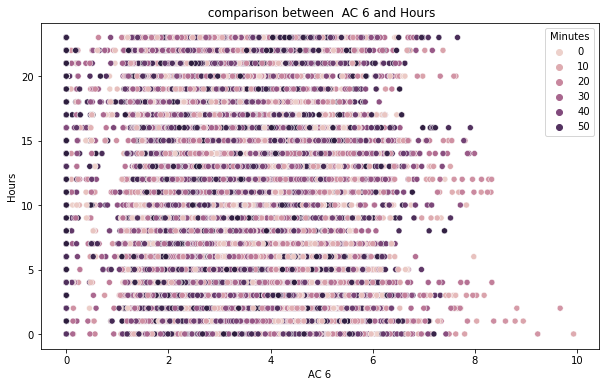

In [119]:
# comparison between  AC 6 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 6 and Hours')
sns.scatterplot(ds['AC 6'], ds['Hours'],hue=ds['Minutes'])

comparison between AC 6 and Hours with respect to Minutes is showing positivity.

<AxesSubplot:title={'center':' comparison between  AC 7 and Hours'}, xlabel='AC 7', ylabel='Hours'>

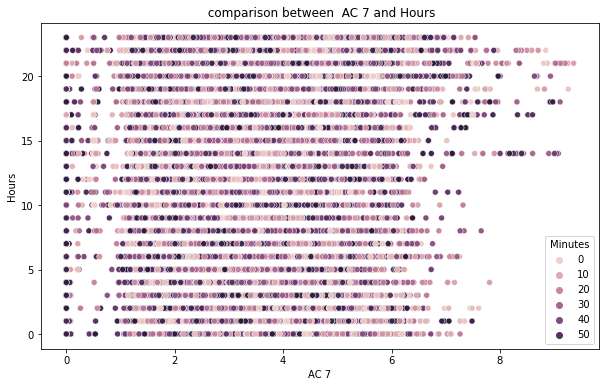

In [120]:
# comparison between  AC 7 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 7 and Hours')
sns.scatterplot(ds['AC 7'], ds['Hours'],hue=ds['Minutes'])

comparison between AC 8 and Hours with respect to Minutes is showing positivity.

<AxesSubplot:title={'center':' comparison between  AC 8 and Hours'}, xlabel='AC 8', ylabel='Hours'>

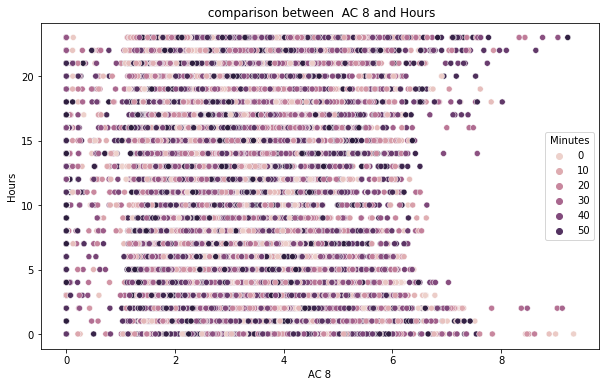

In [121]:
# comparison between  AC 8 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 8 and Hours')
sns.scatterplot(ds['AC 8'], ds['Hours'],hue=ds['Minutes'])

comparison between AC 8 and Hours with respect to Minutes is showing positivity.



<AxesSubplot:title={'center':' comparison between  AC 9 and Hours'}, xlabel='AC 9', ylabel='Hours'>

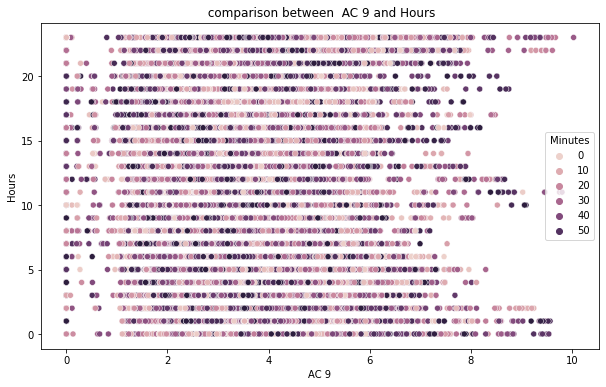

In [122]:
# comparison between  AC 9 and Hours

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 9 and Hours')
sns.scatterplot(ds['AC 9'], ds['Hours'],hue=ds['Minutes'])

comparison between AC 9 and Hours with respect to Minutes is showing positivity.

<AxesSubplot:title={'center':' comparison between  AC 1Date_time and Hours'}, xlabel='AC 1Date_time', ylabel='Minutes'>

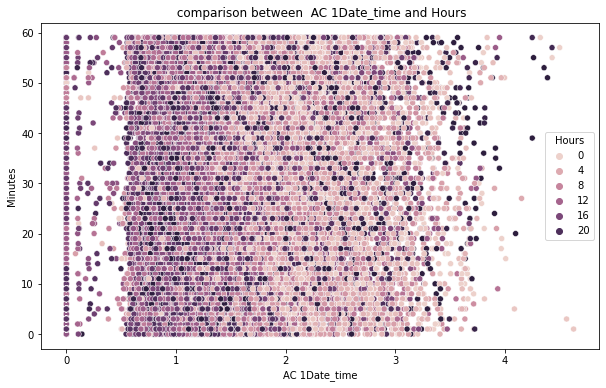

In [125]:
# comparison between  AC 1Date_time and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 1Date_time and Hours')
sns.scatterplot(ds['AC 1Date_time'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 1Date_time and Minutes with respect to Hours is showing positivity and we can also see most of the data is lying in between 0.5 to 3.5 and between 0.5 to 1.5 data is showing dark bubbles

<AxesSubplot:title={'center':' comparison between  AC 11 and Hours'}, xlabel='AC 11', ylabel='Minutes'>

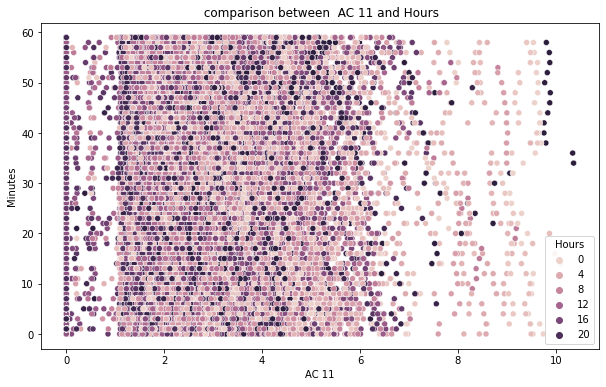

In [126]:
# comparison between  AC 11 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 11 and Hours')
sns.scatterplot(ds['AC 11'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 11 and Minutes with respect to Hours is showing positivity and most of the data is lying in between 1 to approx 6. 

<AxesSubplot:title={'center':' comparison between  AC 12 and Hours'}, xlabel='AC 12', ylabel='Minutes'>

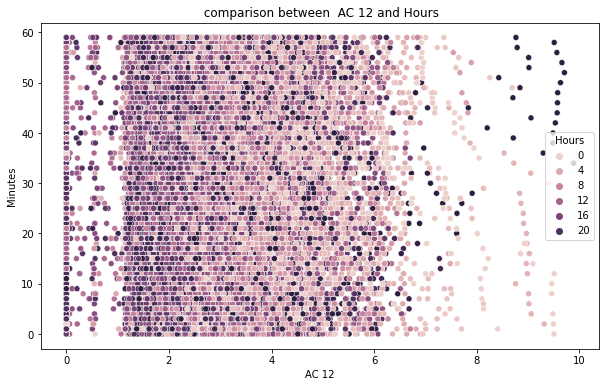

In [127]:
# comparison between  AC 12 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 12 and Hours')
sns.scatterplot(ds['AC 12'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 12 and Minutes with respect to Hours is showing positivity large amount of data is lying in between
1 to approx 6

<AxesSubplot:title={'center':' comparison between  AC 13 and Hours'}, xlabel='AC 13', ylabel='Minutes'>

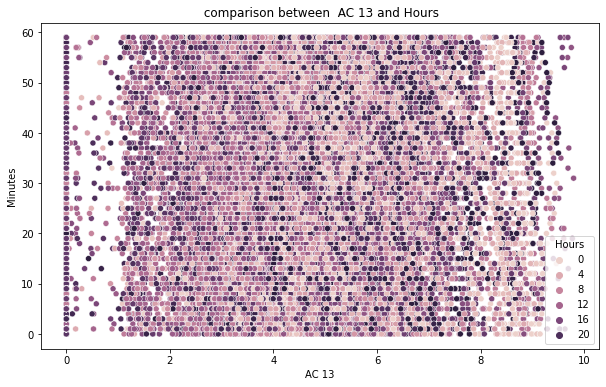

In [128]:
# comparison between  AC 13 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 13 and Hours')
sns.scatterplot(ds['AC 13'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 13 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 1 to approx 9.

<AxesSubplot:title={'center':' comparison between  AC 14 and Hours'}, xlabel='AC 14', ylabel='Minutes'>

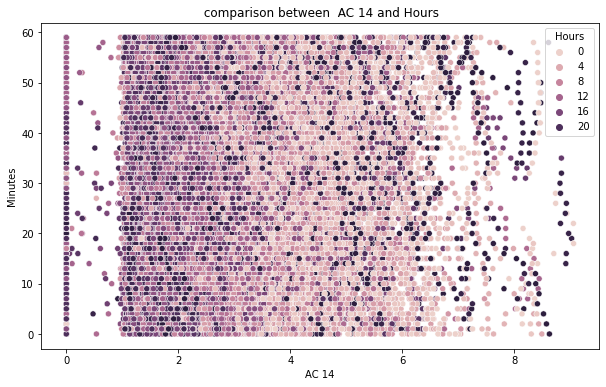

In [129]:
# comparison between  AC 14 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 14 and Hours')
sns.scatterplot(ds['AC 14'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 14 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 1 to approx 7.

<AxesSubplot:title={'center':' comparison between  AC 15 and Hours'}, xlabel='AC 15', ylabel='Minutes'>

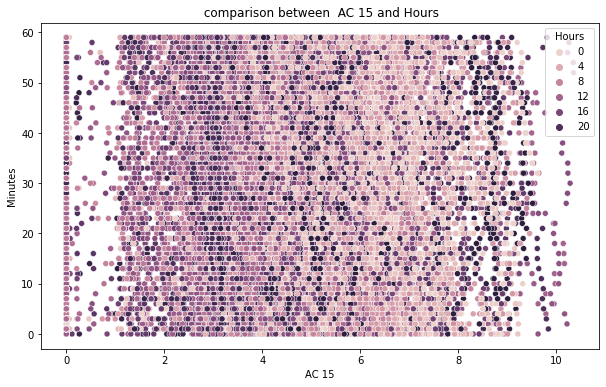

In [130]:
# comparison between  AC 15 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 15 and Hours')
sns.scatterplot(ds['AC 15'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 15 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 1 to approx 9.

<AxesSubplot:title={'center':' comparison between  AC 16 and Hours'}, xlabel='AC 16', ylabel='Minutes'>

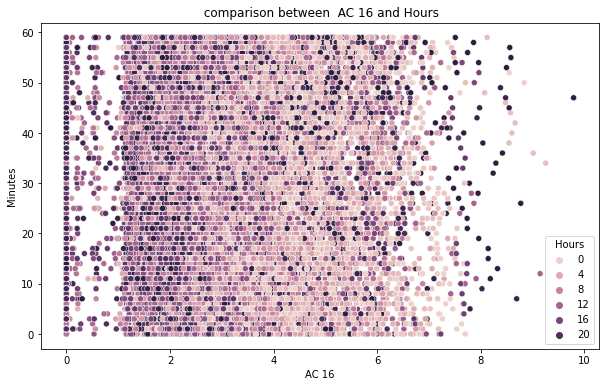

In [131]:
# comparison between  AC 16 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 16 and Hours')
sns.scatterplot(ds['AC 16'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 16 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 1 to approx 7.



<AxesSubplot:title={'center':' comparison between  AC 17 and Hours'}, xlabel='AC 17', ylabel='Minutes'>

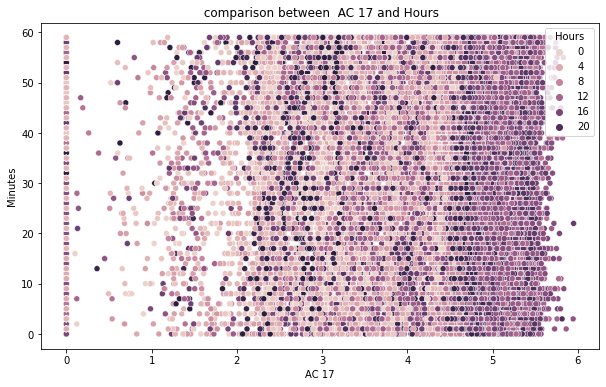

In [132]:
# comparison between  AC 17 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 17 and Hours')
sns.scatterplot(ds['AC 17'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 17 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 2 to approx 5.5 and most of the data is in right side.

<AxesSubplot:title={'center':' comparison between  AC 18 and Hours'}, xlabel='AC 18', ylabel='Minutes'>

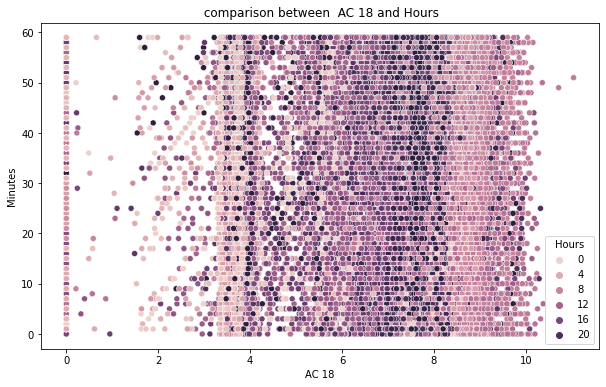

In [133]:
# comparison between  AC 18 and Minutes

plt.figure(figsize=[10,6])
plt.title(' comparison between  AC 18 and Hours')
sns.scatterplot(ds['AC 18'], ds['Minutes'],hue=ds['Hours'])

comparison between AC 18 and Minutes with respect to Hours is showing positivity and large amount of data is lying in between 3 to approx 10 and most of the data is in right side and dark bubbles are in range between 4 to 8.

## Checking Outliers

AC 1                AxesSubplot(0.125,0.749828;0.0824468x0.130172)
AC 2             AxesSubplot(0.223936,0.749828;0.0824468x0.130172)
AC 3             AxesSubplot(0.322872,0.749828;0.0824468x0.130172)
AC 4             AxesSubplot(0.421809,0.749828;0.0824468x0.130172)
AC 5             AxesSubplot(0.520745,0.749828;0.0824468x0.130172)
AC 6             AxesSubplot(0.619681,0.749828;0.0824468x0.130172)
AC 7             AxesSubplot(0.718617,0.749828;0.0824468x0.130172)
AC 8             AxesSubplot(0.817553,0.749828;0.0824468x0.130172)
AC 9                AxesSubplot(0.125,0.593621;0.0824468x0.130172)
AC 1Date_time    AxesSubplot(0.223936,0.593621;0.0824468x0.130172)
AC 11            AxesSubplot(0.322872,0.593621;0.0824468x0.130172)
AC 12            AxesSubplot(0.421809,0.593621;0.0824468x0.130172)
AC 13            AxesSubplot(0.520745,0.593621;0.0824468x0.130172)
AC 14            AxesSubplot(0.619681,0.593621;0.0824468x0.130172)
AC 15            AxesSubplot(0.718617,0.593621;0.0824468x0.130

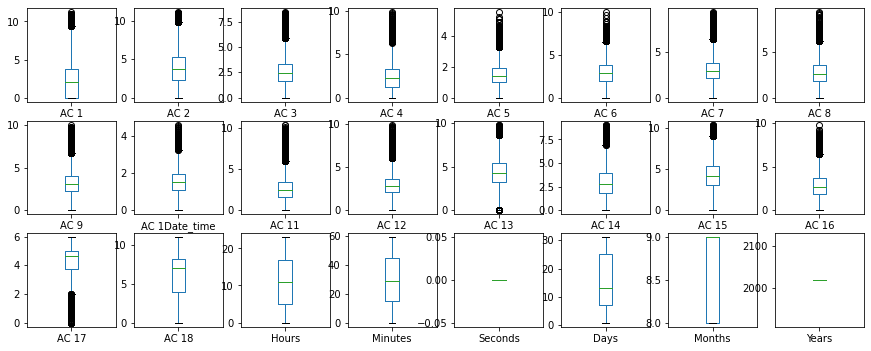

In [135]:
ds.plot(kind='box',subplots=True, layout=(5,8), figsize=(15,10))

Outliers are present in most of the columns , let's see we have to remove it or not because we also have to take care of the important data.

## Checking Correlations

In [136]:
ds.corr()

AC 1      AC 2      AC 3      AC 4      AC 5      AC 6  \
AC 1           1.000000  0.416028  0.233378  0.281061  0.083719  0.203975   
AC 2           0.416028  1.000000  0.213094  0.362051  0.094012  0.169643   
AC 3           0.233378  0.213094  1.000000  0.250412  0.056532  0.085331   
AC 4           0.281061  0.362051  0.250412  1.000000  0.114596  0.148671   
AC 5           0.083719  0.094012  0.056532  0.114596  1.000000  0.225514   
AC 6           0.203975  0.169643  0.085331  0.148671  0.225514  1.000000   
AC 7           0.030513  0.067870  0.004724  0.085629  0.113039  0.195123   
AC 8           0.099697  0.094761  0.099343  0.160494  0.117995  0.210683   
AC 9           0.108493  0.147086  0.125037  0.169338  0.118758  0.185242   
AC 1Date_time  0.200155  0.181491  0.071445  0.184967  0.121127  0.206194   
AC 11          0.311289  0.194264  0.143263  0.128594  0.132794  0.268103   
AC 12          0.184608  0.123539  0.106071  0.150304  0.105301  0.180319   
AC 13          0.265380  0.237877  0.213051  0.227925  0.088216  0.219917   
AC 14          0.180766  0.112667  0.100089  0.182567  0.201873  0.305097   
AC 15          0.319688  0.291734  0.270090  0.198377  0.043345  0.174622   
AC 16          0.281181  0.244663  0.261514  0.177936  0.047873  0.162553   
AC 17         -0.093052  0.039511  0.025570  0.024138  0.029456 -0.050249   
AC 18         -0.035687 -0.043153  0.027001 -0.055188 -0.015945 -0.091364   
Hours         -0.131557 -0.047294 -0.018651 -0.013814 -0.078514 -0.175312   
Minutes       -0.007721 -0.009483 -0.001450  0.007270 -0.005675 -0.004610   
Seconds             NaN       NaN       NaN       NaN       NaN       NaN   
Days          -0.003675  0.108380  0.057844  0.121969 -0.118176 -0.142699   
Months        -0.091081 -0.198553  0.066528 -0.016583  0.043078  0.003572   
Years               NaN       NaN       NaN       NaN       NaN       NaN   

                   AC 7      AC 8      AC 9  AC 1Date_time  ...     AC 15  \
AC 1           0.030513  0.099697  0.108493       0.200155  ...  0.319688   
AC 2           0.067870  0.094761  0.147086       0.181491  ...  0.291734   
AC 3           0.004724  0.099343  0.125037       0.071445  ...  0.270090   
AC 4           0.085629  0.160494  0.169338       0.184967  ...  0.198377   
AC 5           0.113039  0.117995  0.118758       0.121127  ...  0.043345   
AC 6           0.195123  0.210683  0.185242       0.206194  ...  0.174622   
AC 7           1.000000  0.188358  0.212605       0.202997  ...  0.121402   
AC 8           0.188358  1.000000  0.194714       0.205017  ...  0.121137   
AC 9           0.212605  0.194714  1.000000       0.207766  ...  0.172458   
AC 1Date_time  0.202997  0.205017  0.207766       1.000000  ...  0.229850   
AC 11          0.169400  0.190858  0.175673       0.188825  ...  0.256006   
AC 12          0.215177  0.234420  0.182749       0.204173  ...  0.180422   
AC 13          0.129924  0.155652  0.187106       0.184469  ...  0.219626   
AC 14          0.236571  0.336404  0.278938       0.292858  ...  0.173083   
AC 15          0.121402  0.121137  0.172458       0.229850  ...  1.000000   
AC 16          0.063282  0.131406  0.124553       0.249494  ...  0.384256   
AC 17         -0.015448 -0.096313 -0.028540      -0.179593  ... -0.125315   
AC 18         -0.061840 -0.124621 -0.087976      -0.143538  ... -0.107446   
Hours         -0.100730 -0.199072 -0.124719      -0.258164  ... -0.227096   
Minutes        0.010158  0.014513  0.012034      -0.004172  ... -0.005878   
Seconds             NaN       NaN       NaN            NaN  ...       NaN   
Days          -0.142581  0.014650  0.075659      -0.017734  ...  0.049899   
Months        -0.058121  0.045167  0.055906      -0.149356  ... -0.235342   
Years               NaN       NaN       NaN            NaN  ...       NaN   

                  AC 16     AC 17     AC 18     Hours   Minutes  Seconds  \
AC 1           0.281181 -0.093052 -0.035687 -0.131557 -0.007721      NaN   
AC 2           

<AxesSubplot:>

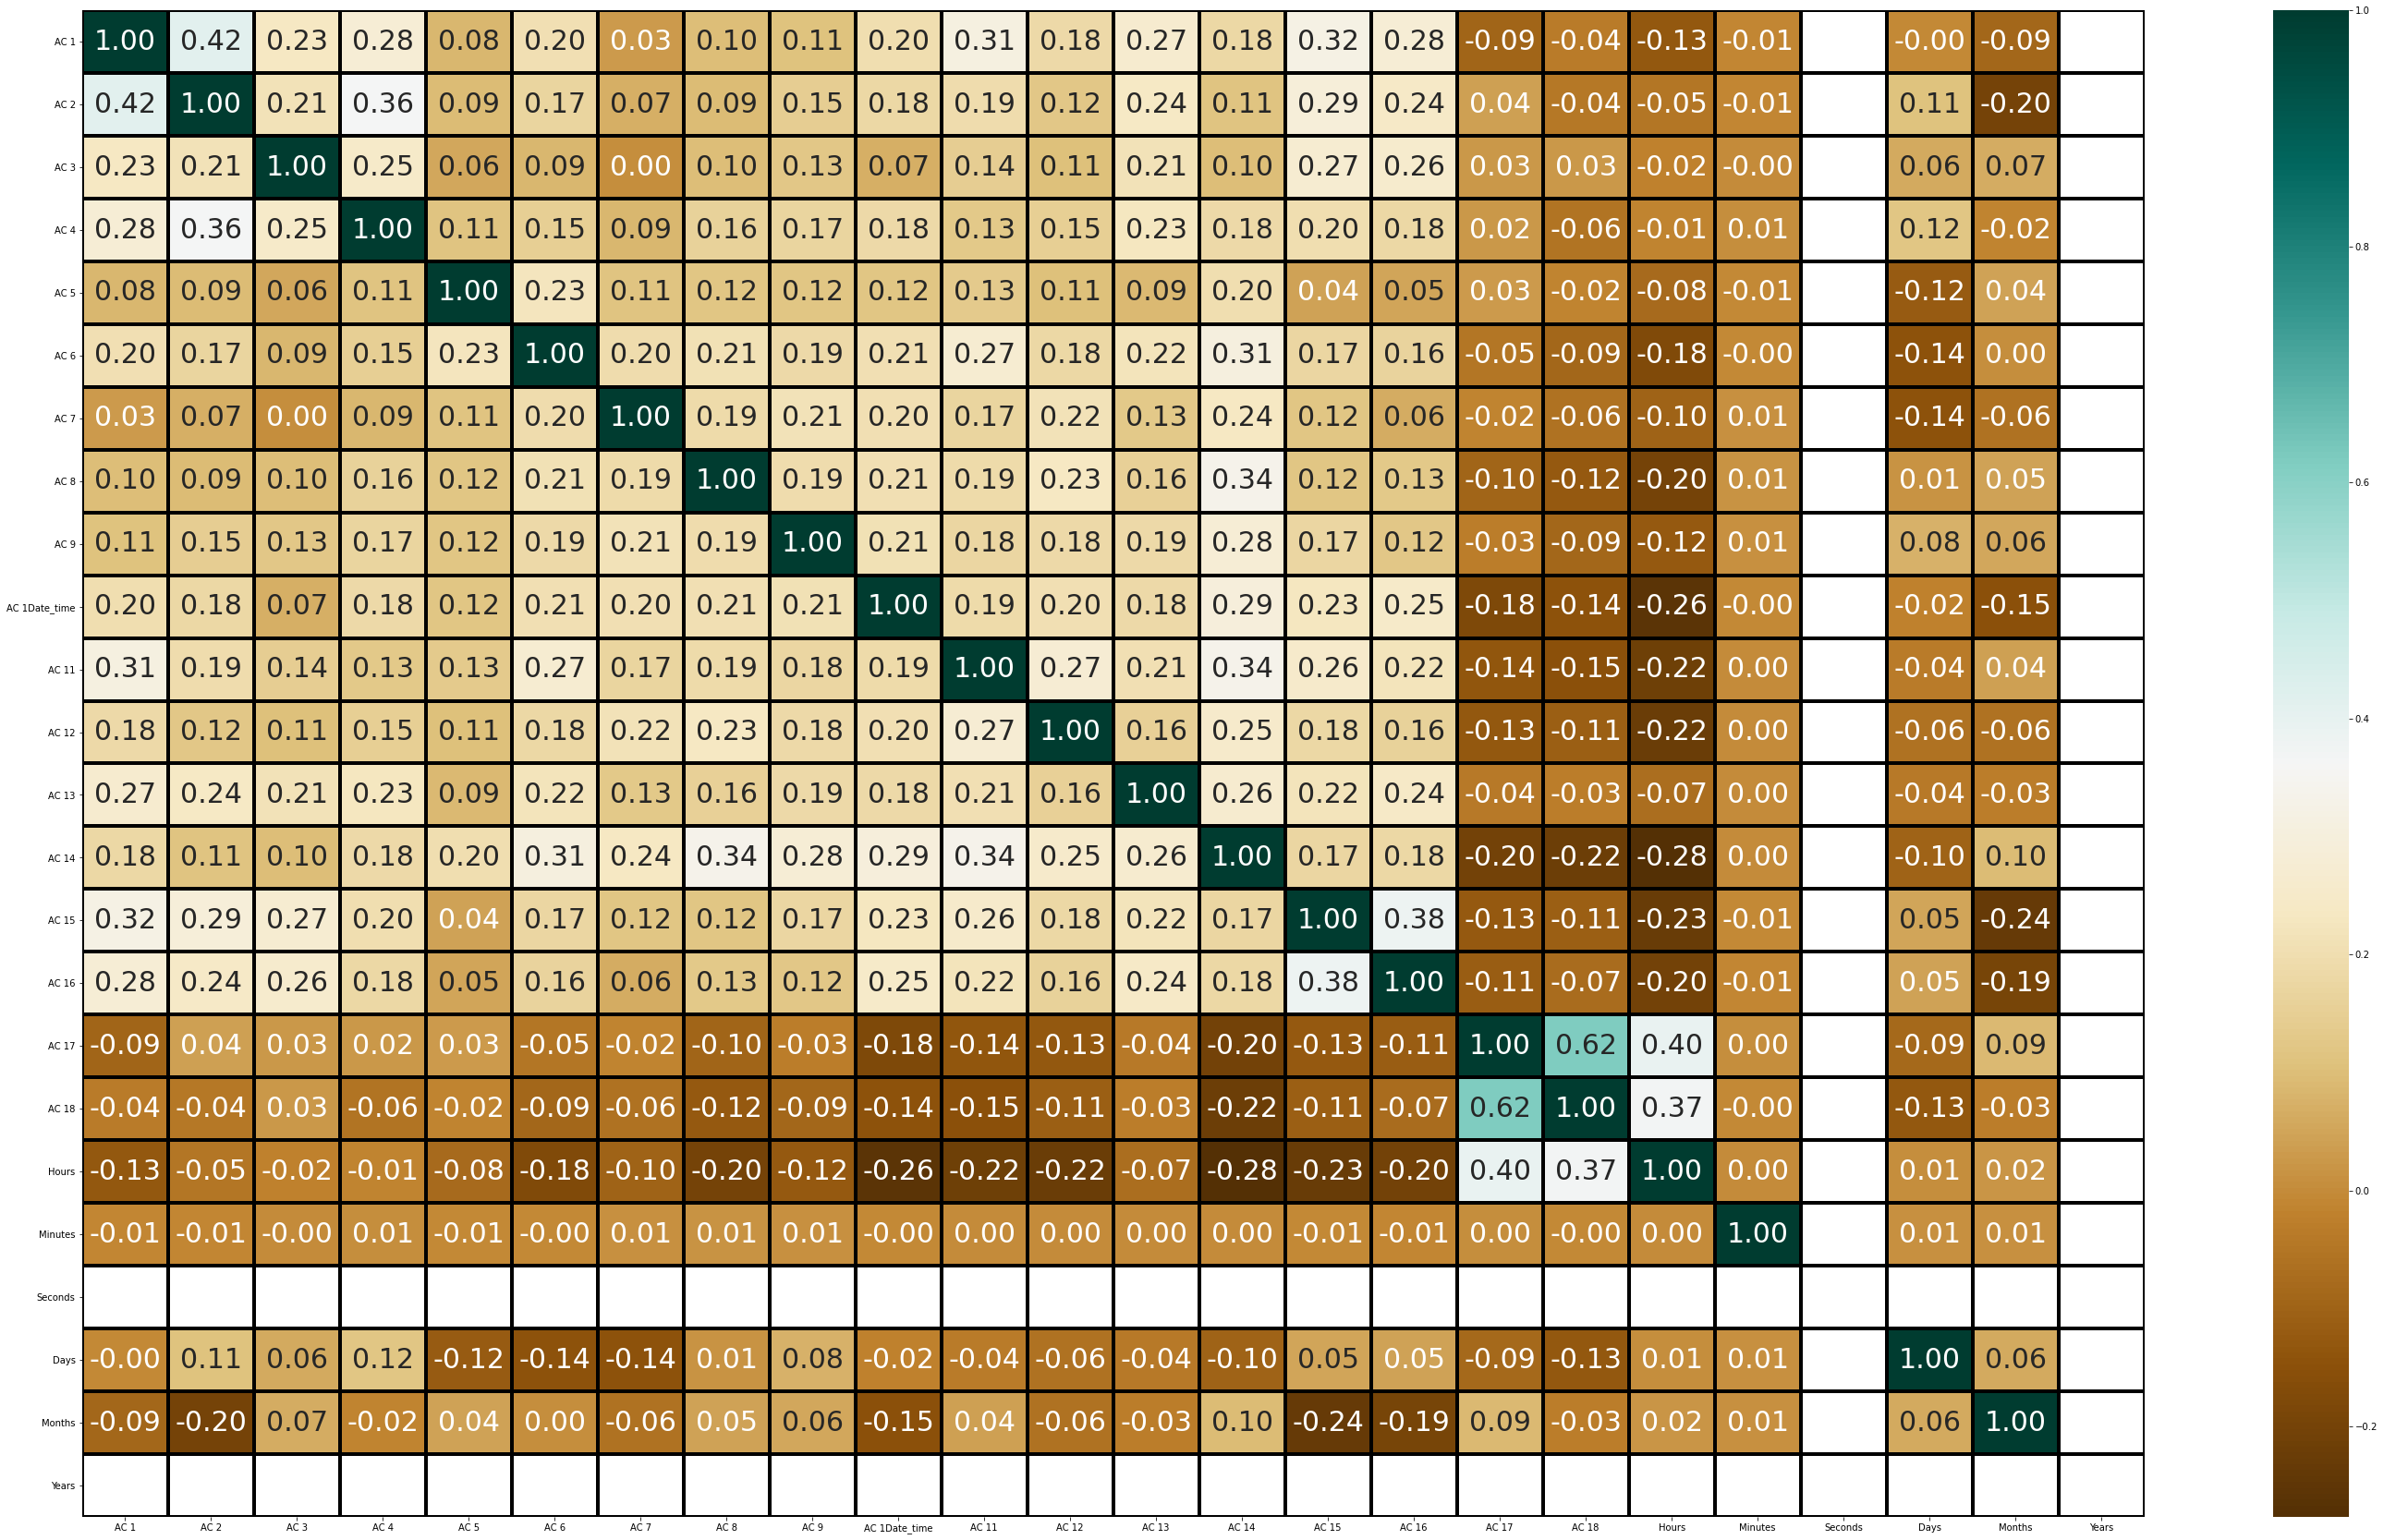

In [138]:
plt.figure(figsize=(50,30))
sns.heatmap(ds.corr(),annot=True,linewidths =3,fmt='0.2f',cmap="BrBG",annot_kws={"size":30}, linecolor='Black')


Only AC 18 column is postively correlated with AC 17 column, other than that remaining column is negatively correlated with each other.

## Statistical Summary

<AxesSubplot:>

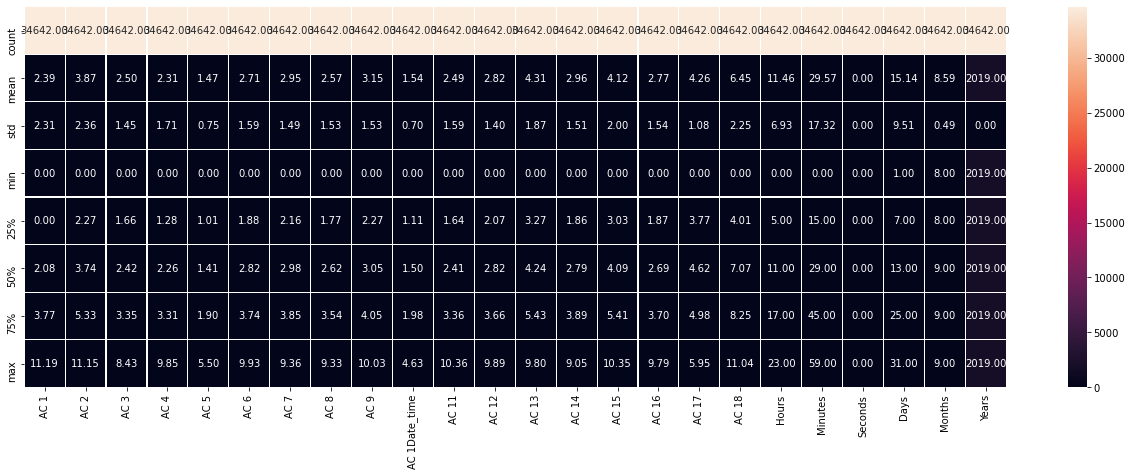

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(ds.describe(),annot=True,linewidths =0.1,fmt='0.2f')

In [140]:
ds.describe()

AC 1          AC 2          AC 3          AC 4          AC 5  \
count  34642.000000  34642.000000  34642.000000  34642.000000  34642.000000   
mean       2.394089      3.872065      2.504698      2.313283      1.466444   
std        2.309156      2.360155      1.452713      1.705811      0.748515   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.272895      1.663072      1.279719      1.008326   
50%        2.081296      3.738743      2.417197      2.255593      1.408948   
75%        3.767716      5.334570      3.351791      3.313595      1.903034   
max       11.194789     11.147141      8.430909      9.849144      5.495358   

               AC 6          AC 7          AC 8          AC 9  AC 1Date_time  \
count  34642.000000  34642.000000  34642.000000  34642.000000   34642.000000   
mean       2.709061      2.945136      2.568989      3.149919       1.539393   
std        1.590249      1.487934      1.531968      1.534838       0.700372   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        1.877316      2.161931      1.766606      2.273552       1.106887   
50%        2.819162      2.976191      2.622136      3.046702       1.500257   
75%        3.742868      3.852767      3.538364      4.046424       1.977836   
max        9.929291      9.356776      9.331506     10.026747       4.625030   

       ...         AC 15         AC 16         AC 17         AC 18  \
count  ...  34642.000000  34642.000000  34642.000000  34642.000000   
mean   ...      4.124136      2.765703      4.255119      6.453815   
std    ...      2.003805      1.538245      1.078238      2.249975   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      3.025756      1.867401      3.773065      4.006869   
50%    ...      4.092966      2.685934      4.624716      7.072846   
75%    ...      5.409613      3.701203      4.977744      8.252815   
max    ...     10.349998      9.789502      5.950261     11.040031   

              Hours       Minutes  Seconds          Days        Months  \
count  34642.000000  34642.000000  34642.0  34642.000000  34642.000000   
mean      11.459038     29.569193      0.0     15.142890      8.591219   
std        6.929537     17.320089      0.0      9.512421      0.491616   
min        0.000000      0.000000      0.0      1.000000      8.000000   
25%        5.000000     15.000000      0.0      7.000000      8.000000   
50%       11.000000     29.000000      0.0     13.000000      9.000000   
75%       17.000000     45.000000      0.0     25.000000      9.000000   
max       23.000000     59.000000      0.0     31.000000      9.000000   

         Years  
count  34642.0  
mean    2019.0  
std        0.0  
min     2019.0  
25%     2019.0  
50%     2019.0  
75%     2019.0  
max     2019.0  

[8 rows x 24 columns]

Number of count is same in every column.

There is not much difference between mean and median(50%) in any column.

There is little difference between 75% and max in all of the columns.

And data is not much deviated.

## Saving datset into csv file for the attatchment of temprature data of Gurgaon

In [141]:
ds.to_csv('ac_gurgaon.csv')